# 梯度下降可视化高级案例

## Python 中的 3D 地形

在 Python 中生成和可视化 3D 地形

首先，在生成 3D 地形之前，最好先生成 2D 地形。为了实现这一目标，我们将使用Perlin Noise。 Perlin 噪声由 Ken Perlin 于 1983 年为电影 Tron 创建，最初是为了在表面上制作更自然的纹理而开发的。维基百科网站对算法在幕后的工作原理进行了详细的图形分解。

对于 Python 中的 Perlin 噪声，我们不需要自己实现它，而是有一个名为 的包（具有一个非常恰当的名称）noise。该noise软件包内部包含多种算法，用于生成不同类型的噪声。

为了首先可视化我们的地形，我们将使用matplotlib.

与往常一样，我们在一开始就导入项目所需的库。请注意mpl_toolkits.mplot3d，它是matplotlib3 维绘图​​所必需的。如果您在笔记本中工作jupyter，当您使用 matplotlib 以 3D 进行绘图时，生成的图形将不会是交互式的，除非%matplotlib qt使用 magic 命令并将pyqt5其安装在您的环境中。这将为您的绘图创建一个新窗口，您可以在其中与其交互。

In [1]:
%matplotlib inline
import noise
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import axes3d

现在我们已经导入了所有必需的库。让我们了解如何noise通过使用该help()函数与包进行交互。正如我们在下面看到的，在传递到任何函数时会使用许多设置pnoisex（将 x 替换为维度数量，例如 2 表示 2 维度）。

In [2]:
help(noise.pnoise2)
help(noise.pnoise3)

Help on built-in function noise2 in module noise._perlin:

noise2(...)
    noise2(x, y, octaves=1, persistence=0.5, lacunarity=2.0, repeatx=1024, repeaty=1024, base=0.0)

    2 dimensional perlin improved noise function (see noise3 for more info)

Help on built-in function noise3 in module noise._perlin:

noise3(...)
    noise3(x, y, z, octaves=1, persistence=0.5, lacunarity=2.0repeatx=1024, repeaty=1024, repeatz=1024, base=0.0)

    return perlin "improved" noise value for specified coordinate

    octaves -- specifies the number of passes for generating fBm noise,
    defaults to 1 (simple noise).

    persistence -- specifies the amplitude of each successive octave relative
    to the one below it. Defaults to 0.5 (each higher octave's amplitude
    is halved). Note the amplitude of the first pass is always 1.0.

    lacunarity -- specifies the frequency of each successive octave relative
    to the one below it, similar to persistence. Defaults to 2.0.

    repeatx, repeaty, repeat

In [3]:
shape = (50,50)
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0

现在生成我们的 2D 地形！我们初始化一个numpy 数组，它将包含我们世界的值。当我们用全零值初始化数组时，现在是时候迭代空数组并用Perlin 噪声填充它了！

In [4]:
world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=42)

我们现在已经初始化了我们的二维数组，里面包含了地形的所有值，现在让我们来绘制它!因为我们要模拟地形，所以让我们使用“地形”颜色图。这里列出了matplotlib中所有可用的颜色映射

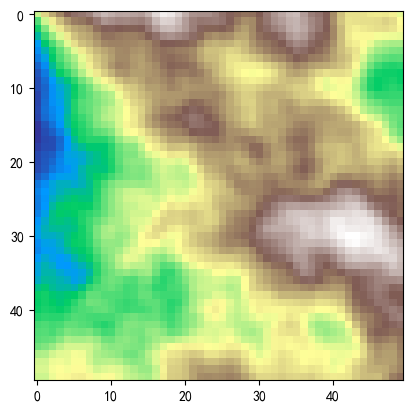

In [5]:
matplotlib.pyplot.imshow(world,cmap='terrain')

美丽的！现在我们可以看到一侧的“湖”和右侧的“山”。

为了在 3 维中绘制此图，我们必须初始化另外 2 个数组，其中将包含我们世界的 xy 坐标。

In [6]:
lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)
x,y = np.meshgrid(lin_x,lin_y)

现在是时候使用 matplotlib 进行 3D 绘图了，如果您使用的是有关交互性的 jupyter，上面会有一条注释。

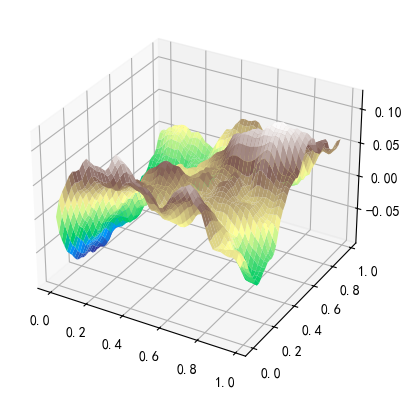

In [7]:
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x,y,world,cmap='terrain')

现在让我们使用Plotly来制作一个交互式绘图，以便每个人都可以在我们的地形中飞行。

为了确保我们可以保持相同的颜色图，Plotly很好地记录了从 matplotlib 颜色图到 Plotly 兼容颜色图的转换。此处列出：

In [8]:
terrain_cmap = matplotlib.colormaps.get_cmap('terrain')
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

terrain = matplotlib_to_plotly(terrain_cmap, 255)

终于到了制作交互式图表的时候了！对我们来说幸运的是，Plotly 已经创建了 JavaScript 库的 API，因此可以仅用 Python 生成。

In [9]:
import plotly
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)

fig = go.Figure(data=[go.Surface(colorscale=terrain,z=world)])

fig.update_layout(title='Random 3D Terrain')

# Note that include_plotlyjs is used as cdn so that the static site generator can read it and present it on the browser. This is not typically required.
html = plotly.offline.plot(fig, filename='3d-terrain-plotly.html',include_plotlyjs='cdn')

In [10]:
from IPython.core.display import HTML
HTML(html)

> https://jackmckew.dev/3d-terrain-in-python#3d-terrain-in-python

## Python 中的 3D 梯度下降

今天我们将演示梯度下降如何在 3 维中表现，并生成类似于地形可视化。请注意，我对梯度下降的理解与优化问题中大量使用的梯度下降函数的行为方式并不相似，尽管这确实有助于演示。

首先，我们需要导入我们需要使用的所有包，然后我们将使用numpy上次使用Perlin Noise生成的数组。接下来，我们将找到全局最大值和最小值，并将其绘制在二维等值线图上。最大值（最高点）由红点显示，而最小值（最低点）由黄点显示。

In [11]:
from IPython.core.display import HTML
import plotly
import plotly.graph_objects as go
import noise
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

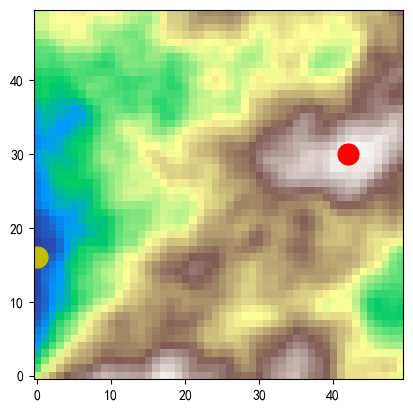

In [12]:
z = world
matplotlib.pyplot.imshow(z,origin='lower',cmap='terrain')

# Find maximum value index in numpy array
indices = np.where(z == z.max())
max_z_x_location, max_z_y_location = (indices[1][0],indices[0][0])
matplotlib.pyplot.plot(max_z_x_location,max_z_y_location,'ro',markersize=15)

# Find minimum value index in numpy array
indices = np.where(z == z.min())
min_z_x_location, min_z_y_location = (indices[1][0],indices[0][0])
matplotlib.pyplot.plot(min_z_x_location,min_z_y_location,'yo',markersize=15)

对于本博文中的实现，我们将通过搜索某个索引周围的“相邻”值来评估我们的数组，而不是计算每个点的梯度（典型实现）。幸运的是， Stackoverflow上pv的一个答案已经为我们解决了这个问题。

In [13]:
# Source: https://stackoverflow.com/questions/10996769/pixel-neighbors-in-2d-array-image-using-python
# This code by pv (https://stackoverflow.com/users/108184/pv), is to find all the adjacent values around a specific index
import numpy as np
from numpy.lib.stride_tricks import as_strided

def sliding_window(arr, window_size):
    """ Construct a sliding window view of the array"""
    arr = np.asarray(arr)
    window_size = int(window_size)
    if arr.ndim != 2:
        raise ValueError("need 2-D input")
    if not (window_size > 0):
        raise ValueError("need a positive window size")
    shape = (arr.shape[0] - window_size + 1,
             arr.shape[1] - window_size + 1,
             window_size, window_size)
    if shape[0] <= 0:
        shape = (1, shape[1], arr.shape[0], shape[3])
    if shape[1] <= 0:
        shape = (shape[0], 1, shape[2], arr.shape[1])
    strides = (arr.shape[1]*arr.itemsize, arr.itemsize,
               arr.shape[1]*arr.itemsize, arr.itemsize)
    return as_strided(arr, shape=shape, strides=strides)

def cell_neighbours(arr, i, j, d):
    """Return d-th neighbors of cell (i, j)"""
    w = sliding_window(arr, 2*d+1)

    ix = np.clip(i - d, 0, w.shape[0]-1)
    jx = np.clip(j - d, 0, w.shape[1]-1)

    i0 = max(0, i - d - ix)
    j0 = max(0, j - d - jx)
    i1 = w.shape[2] - max(0, d - i + ix)
    j1 = w.shape[3] - max(0, d - j + jx)

    return w[ix, jx][i0:i1,j0:j1].ravel()

现在我们将实现我们的函数，该函数将计算从数组中的一个点开始的数组的梯度下降，并指定最大步数和步长大小。

这是通过以下方式实现的：

提取指定点周围所有值的较小子集数组（在本文中我们将从最大点开始），
找到该数组中的最小值（推断当前点的最大斜率），
将我们当前的位置移动到最小
重复直到点与上一步相同
我们还将梯度下降的所有先前步骤存储在一个列表中，以便我们稍后可以使用它来绘制。

In [14]:
from dataclasses import dataclass

@dataclass
class descent_step:
    """Class for storing each step taken in gradient descent"""
    value: float
    x_index: float
    y_index: float

def gradient_descent_3d(array,x_start,y_start,steps=50,step_size=1,plot=False):
    # Initial point to start gradient descent at
    step = descent_step(array[y_start][x_start],x_start,y_start)
    
    # Store each step taken in gradient descent in a list
    step_history = []
    step_history.append(step)
    
    # Plot 2D representation of array with startng point as a red marker
    if plot:
        matplotlib.pyplot.imshow(array,origin='lower',cmap='terrain')
        matplotlib.pyplot.plot(x_start,y_start,'ro')
    current_x = x_start
    current_y = y_start

    # Loop through specified number of steps of gradient descent to take
    for i in range(steps):
        prev_x = current_x
        prev_y = current_y
        
        # Extract array of neighbouring cells around current step location with size nominated
        neighbours=cell_neighbours(array,current_y,current_x,step_size)
        
        # Locate minimum in array (steepest slope from current point)
        next_step = neighbours.min()
        indices = np.where(array == next_step)
        
        # Update current point to now be the next point after stepping
        current_x, current_y = (indices[1][0],indices[0][0])
        step = descent_step(array[current_y][current_x],current_x,current_y)
        
        step_history.append(step)
        
        # Plot each step taken as a black line to the current point nominated by a red marker
        if plot:
            matplotlib.pyplot.plot([prev_x,current_x],[prev_y,current_y],'k-')
            matplotlib.pyplot.plot(current_x,current_y,'ro')
            
        # If step is to the same location as previously, this infers convergence and end loop
        if prev_y == current_y and prev_x == current_x:
            print(f"Converged in {i} steps")
            break
    return next_step,step_history

接下来，为了确保我们最终得到全局最小值，我们循环遍历每个步长，直到我们得到一个足够大的步长来达到全局最小值。

> 注意，这在一些梯度下降的实现中可能是不可行的，但为了演示目的，我们将在这里使用它

然后我们随机选择一个点作为算法的起始点，然后计算梯度下降，直到我们有一个足够大的步长来达到全局最小值(见下面的步长小于所需的步长)。

Target: -0.0994970053434372 @ (array([16], dtype=int64), array([0], dtype=int64))
Converged in 9 steps
Converged in 5 steps
Converged in 7 steps
Converged in 6 steps
Converged in 4 steps
Converged in 4 steps
Converged in 3 steps
Converged in 3 steps
Converged in 3 steps
Converged in 5 steps
Optimal step size 10
Converged in 5 steps
Steps: [descent_step(value=0.10347005724906921, x_index=38, y_index=28), descent_step(value=0.007558110170066357, x_index=28, y_index=38), descent_step(value=-0.03461135923862457, x_index=18, y_index=39), descent_step(value=-0.03682023286819458, x_index=8, y_index=35), descent_step(value=-0.07587684690952301, x_index=0, y_index=26), descent_step(value=-0.0994970053434372, x_index=0, y_index=16), descent_step(value=-0.0994970053434372, x_index=0, y_index=16)]


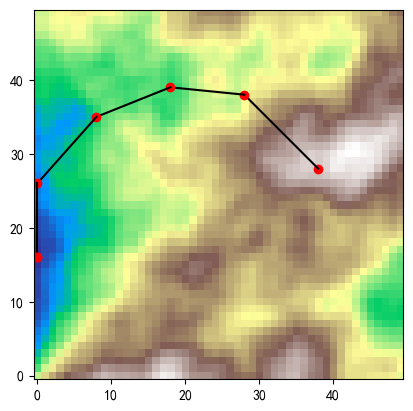

In [15]:
np.random.seed(42)
global_minimum = z.min()
indices = np.where(z == global_minimum)
print(f"Target: {global_minimum} @ {indices}")

step_size = 0
found_minimum = 99999

# Random starting point
start_x = np.random.randint(0,50)
start_y = np.random.randint(0,50)

# Increase step size until convergence on global minimum
while found_minimum != global_minimum:
    step_size += 1
    found_minimum,steps = gradient_descent_3d(z,start_x,start_y,step_size=step_size,plot=False)

print(f"Optimal step size {step_size}")
found_minimum,steps = gradient_descent_3d(z,start_x,start_y,step_size=step_size,plot=True)
print(f"Steps: {steps}")

从每个点移动到下一个点通常被表示为一个向量，在我们的例子中，这将是在三维空间中。在2D空间中，你可以使用一个抖动图来显示它，在3D空间中，你可以使用一个锥形图。为了计算每个步骤之间的向量，我们再次从技术上的答案转向Stackoverflow。

In [16]:
# Source https://stackoverflow.com/questions/51272288/how-to-calculate-the-vector-from-two-points-in-3d-with-python

def multiDimenDist(point1,point2):
   #find the difference between the two points, its really the same as below
   deltaVals = [point2[dimension]-point1[dimension] for dimension in range(len(point1))]
   runningSquared = 0
   #because the pythagarom theorm works for any dimension we can just use that
   for coOrd in deltaVals:
       runningSquared += coOrd**2
   return runningSquared**(1/2)
def findVec(point1,point2,unitSphere = False):
  #setting unitSphere to True will make the vector scaled down to a sphere with a radius one, instead of it's orginal length
  finalVector = [0 for coOrd in point1]
  for dimension, coOrd in enumerate(point1):
      #finding total differnce for that co-ordinate(x,y,z...)
      deltaCoOrd = point2[dimension]-coOrd
      #adding total difference
      finalVector[dimension] = deltaCoOrd
  if unitSphere:
      totalDist = multiDimenDist(point1,point2)
      unitVector =[]
      for dimen in finalVector:
          unitVector.append( dimen/totalDist)
      return unitVector
  else:
      return finalVector

最后，我们构建了一个可以使用Plotly生成3D图的函数，类似于地形可视化，将梯度下降中的步骤可视化为锥和线。

In [17]:
def generate_3d_plot(step_history):
    # Initialise empty lists for markers
    step_markers_x = []
    step_markers_y = []
    step_markers_z = []
    step_markers_u = []
    step_markers_v = []
    step_markers_w = []
    
    for index, step in enumerate(step_history):
        step_markers_x.append(step.x_index)
        step_markers_y.append(step.y_index)
        step_markers_z.append(step.value)
        
        # If we haven't reached the final step, calculate the vector between the current step and the next step
        if index < len(steps)-1:
            vec1 = [step.x_index,step.y_index,step.value]
            vec2 = [steps[index+1].x_index,steps[index+1].y_index,steps[index+1].value]

            result_vector = findVec(vec1,vec2)
            step_markers_u.append(result_vector[0])
            step_markers_v.append(result_vector[1])
            step_markers_w.append(result_vector[2])
        else:
            step_markers_u.append(0.1)
            step_markers_v.append(0.1)
            step_markers_w.append(0.1)
    
    # Include cones at each marker to show direction of step, scatter3d is to show the red line between points and surface for the terrain
    fig = go.Figure(data=[
        go.Cone(
        x=step_markers_x,
        y=step_markers_y,
        z=step_markers_z,
        u=step_markers_u,
        v=step_markers_v,
        w=step_markers_w,
        sizemode="absolute",
        sizeref=2,
        anchor='tail'),

        go.Scatter3d(
        x=step_markers_x,
        y=step_markers_y,
        z=step_markers_z,
        mode='lines',
        line=dict(
            color='red',
            width=2
        )),

        go.Surface(colorscale=terrain,z=world,opacity=0.5)])


    # Z axis is limited to the extent of the terrain array
    fig.update_layout(
        title='Gradient Descent Steps',
        scene = dict(zaxis = dict(range=[world.min(),world.max()],),),)
    return fig
    
# Generate 3D plot from previous random starting location
fig = generate_3d_plot(steps)
HTML(plotly.offline.plot(fig, filename='random_starting_point_3d_gradient_descent.html',include_plotlyjs='cdn'))

为了证明梯度下降是如何被卡住的，通过设置梯度下降算法从一个步长为5的最大值点开始，我们可以看到它是如何直接落入最近的沟里(局部最小值)，然后无法从中出来的。

Converged in 3 steps


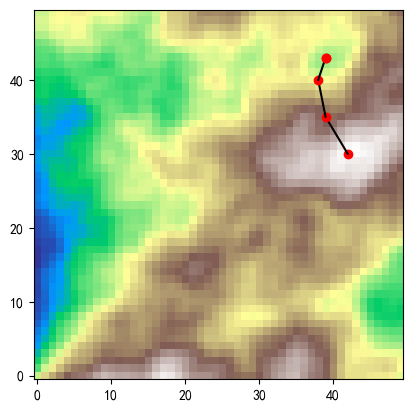

In [18]:
found_minimum,steps = gradient_descent_3d(z,max_z_x_location,max_z_y_location,step_size=5,plot=True)
fig = generate_3d_plot(steps)
HTML(plotly.offline.plot(fig, filename='maximum_starting_point_step_size_5_3d_gradient_descent.html',include_plotlyjs='cdn'))

> https://jackmckew.dev/3d-gradient-descent-in-python.html